<a href="https://colab.research.google.com/github/AlexanderKruger/ENEL645_FinalProject_Group13/blob/main/final_project_group_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
'''
autoreload works on IPython versions 6.0 and higher. It reloads modules after
you save them.

https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
'''
%reload_ext autoreload
'''
Mark modules for autoreload explicitly.
Note, we have to use 1 instead of explicit. For some reason the explicit parameter
never autoreloads %aimport modules.
'''
%autoreload 1

%aimport final_project_group_13_utlis
from final_project_group_13_utlis import *

# 1. Configuration


In [2]:
dataset_path = Path(
    r'C:\Users\Michael Metz\Documents\Education\MEng Software\2023-01 - 2023-04 Winter\ENEL 645\BreakHis\BreaKHis_v1\BreaKHis_v1\histology_slides\breast'
)
'''
The path where the two class folders (benign, malignant) of images reside.

raw strings can be used in-case you use a Windows path with `\`.

If you want any other paths in this script to be cross platform, you *must* use
the forward slash `/` to make the paths work on Linux or Mac. But if you are
just using a path on only a Windows machine (like this dataset_path) you can
use '\`.

Also note you can't end a raw string with a `\` (and don't need to in this case
as we just need the path up to the folder)
'''

class_list = ['benign', 'malignant']
'''
List of expected class subfolders in the dataset folder.
'''

train_split = 0.6
'''
Set the train split. Train, validation, test split must add up to approximately 1.0.
'''

validation_split = 0.1
'''
Set the validation split. Train, validation, test split must add up to approximately 1.0.
'''

test_split = 1.0 - validation_split - train_split
'''
Set the test split. Train, validation, test split must add up to approximately 1.0.
'''

random_seed = 154
'''
Used for configuring a consistent random_seed where we need randomness with
reproducable results, like when shuffling the order of images.
'''

batch_size = 128
'''
The batch_size for training.
'''

image_size = (224, 340)
'''
The image size of all images in the dataset.
'''

crop_size = (224, 224)
'''
The size to randomly crop all images to during preprocessing (including train, validation, test).
'''

"""
Enable memory growth for the first GPU detected instead of assigning all
of the device memory during runtime initialization
"""
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


# 2. Stratify Split the data into development and test datasets


In [3]:
training_dataset_path, validation_dataset_path, test_dataset_path \
    = stratified_train_val_test_split_into_folders(
        dataset_path,
        move=False,
        train_split=train_split,
        validation_split=validation_split,
        test_split=test_split,
        random_seed=random_seed
    )

display([training_dataset_path, validation_dataset_path, test_dataset_path])


Not copying files as C:\Users\Michael Metz\Documents\Education\MEng Software\2023-01 - 2023-04 Winter\ENEL 645\BreakHis\BreaKHis_v1\BreaKHis_v1\histology_slides\breast\split_data already esists
Development benign set length: 1736
Test benign set length: 744
Development benign image count: 1736
Test benign image count: 744
Training benign set length: 1488
Validation benign set length: 248
Training benign image count: 1488
Validation benign image count: 248

Development malignant set length: 3800
Test malignant set length: 1629
Development malignant image count: 3800
Test malignant image count: 1629
Training malignant set length: 3257
Validation malignant set length: 543
Training malignant image count: 3257
Validation malignant image count: 543



['C:\\Users\\Michael Metz\\Documents\\Education\\MEng Software\\2023-01 - 2023-04 Winter\\ENEL 645\\BreakHis\\BreaKHis_v1\\BreaKHis_v1\\histology_slides\\breast\\split_data\\training',
 'C:\\Users\\Michael Metz\\Documents\\Education\\MEng Software\\2023-01 - 2023-04 Winter\\ENEL 645\\BreakHis\\BreaKHis_v1\\BreaKHis_v1\\histology_slides\\breast\\split_data\\validation',
 'C:\\Users\\Michael Metz\\Documents\\Education\\MEng Software\\2023-01 - 2023-04 Winter\\ENEL 645\\BreakHis\\BreaKHis_v1\\BreaKHis_v1\\histology_slides\\breast\\split_data\\test']

## Load unprocessed datasets - preprocess datasets


In [4]:
train_ds_unprocessed: tf.data.Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_dataset_path,
    shuffle=True,
    label_mode='categorical',
    seed=random_seed,
    batch_size=batch_size,
    image_size=image_size)

validation_ds_unprocessed: tf.data.Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dataset_path,
    shuffle=False,
    label_mode='categorical',
    seed=random_seed,
    batch_size=batch_size,
    image_size=image_size)

test_ds_unprocessed: tf.data.Dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    label_mode='categorical',
    seed=random_seed,
    batch_size=batch_size,
    image_size=image_size)


ds_unprocessed = (
    train_ds_unprocessed
    .concatenate(validation_ds_unprocessed)
    .concatenate(test_ds_unprocessed)
)


Found 4745 files belonging to 2 classes.
Found 791 files belonging to 2 classes.
Found 2373 files belonging to 2 classes.


In [5]:
train_ds, val_ds = preprocess_train_val(
    training_dataset_path,
    validation_dataset_path,
    image_size=image_size,
    crop_size=crop_size,
    batch_size=batch_size
)

test_ds = preprocess_test(
    test_dataset_path,
    image_size=image_size,
    crop_size=crop_size,
    batch_size=batch_size
)

display([train_ds, val_ds, test_ds])


Found 4745 files belonging to 2 classes.
Found 791 files belonging to 2 classes.
Found 2373 files belonging to 2 classes.


[<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>]

# 3. Closer Look at the Data


## Check the number of samples and targets in the dataset


In [6]:
def count_dataset(dataset: tf.data.Dataset):
    '''
    Can't use dataset.cardinality() or len(dataset) because that only counts
    the number of batches.
    '''
    return sum([len(labels_batch) for _, labels_batch in dataset])


In [7]:
train_ds_count = count_dataset(train_ds)
val_ds_count = count_dataset(val_ds)
test_ds_count = count_dataset(test_ds)

print('train_ds count:', train_ds_count)
print('val_ds count:', val_ds_count)
print('test_ds count:', test_ds_count)
print('full dataset length:', train_ds_count + val_ds_count + test_ds_count)


train_ds count: 4745
val_ds count: 791
test_ds count: 2373
full dataset length: 7909


## Show the classes we will be classifying to in their indexed order


In [8]:
# all train, val, test datasets have the same classes.
train_ds_unprocessed.class_names


['benign', 'malignant']

## Show distribution of each label


In [9]:
def get_count_by_class(dataset):
    class_count_dict = {}

    Y_one_hot_tensor = tf.concat(
        [label_one_hot_batch for _, label_one_hot_batch in dataset],
        axis=0)

    '''
    convert to int, tf.keras.preprocessing.image_dataset_from_directory
    caused the one-hot encoding Tensor to become float32.
    '''
    Y_one_hot: np.ndarray = Y_one_hot_tensor.numpy().astype(int)
    Y_sum = Y_one_hot.sum(axis=0)

    for i, class_ in enumerate(class_list):
        class_count_dict[class_] = Y_sum[i]

    return class_count_dict


def bar_plot_count_dict(count_dict, *, title='', xlabel=''):
    counts = np.array(list(count_dict.values()))
    counts_total = counts.sum()

    bar_container = plt.bar(range(len(count_dict)), counts)
    plt.title(title)
    plt.xticks(range(len(count_dict)), list(count_dict.keys()))
    plt.xlabel(xlabel)
    plt.ylabel('Count')

    bar_labels = []
    for count in counts:
        bar_labels.append('{} ({:.2%})'.format(count, count / counts_total))

    plt.bar_label(bar_container, labels=bar_labels)


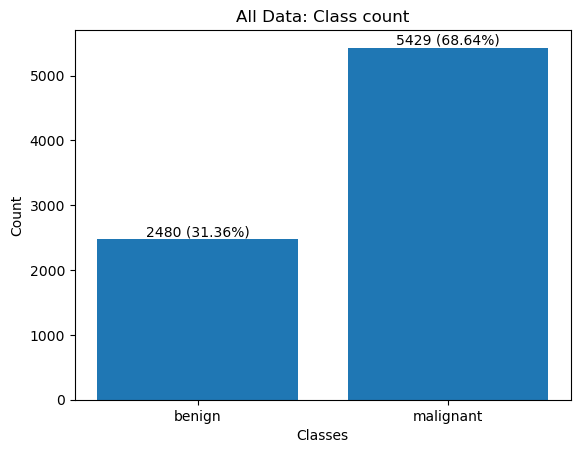

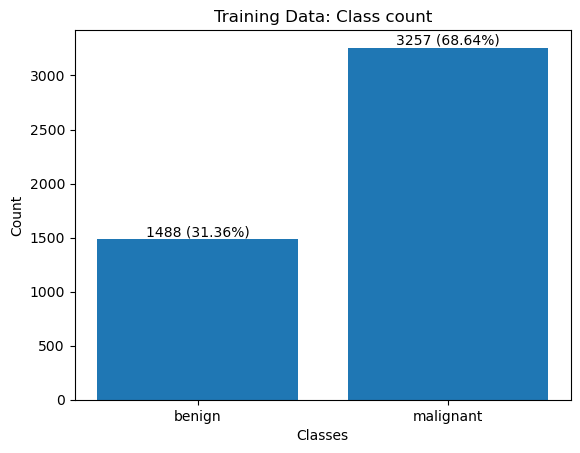

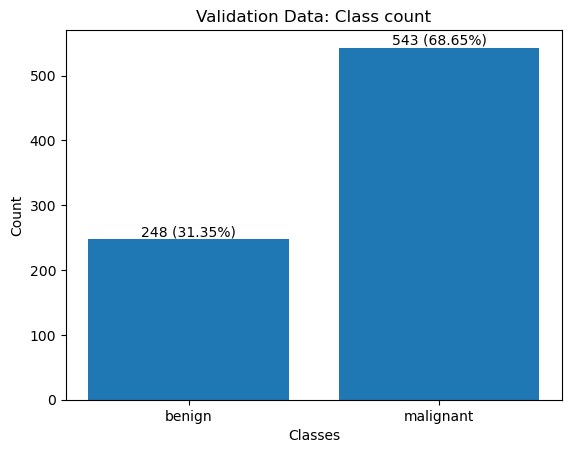

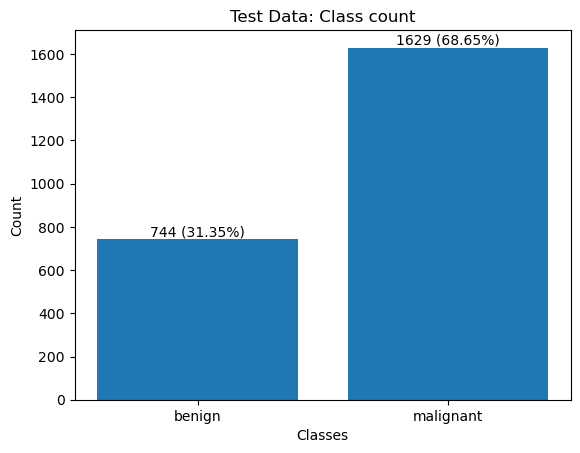

In [10]:
class_count_dict = get_count_by_class(ds_unprocessed)

bar_plot_count_dict(
    class_count_dict, title='All Data: Class count', xlabel='Classes')


# create a new figure so all of the graphs aren't on the same figure.
plt.figure()

class_count_dict = get_count_by_class(train_ds)

bar_plot_count_dict(
    class_count_dict, title='Training Data: Class count', xlabel='Classes')


plt.figure()

class_count_dict = get_count_by_class(val_ds)

bar_plot_count_dict(
    class_count_dict, title='Validation Data: Class count', xlabel='Classes')


plt.figure()

class_count_dict = get_count_by_class(test_ds)

bar_plot_count_dict(
    class_count_dict, title='Test Data: Class count', xlabel='Classes')


In [11]:
def plot_images(dataset, *, n_images_to_show=16, n_image_cols=4, batch_size=batch_size, suptitle=''):

    # int_class_dict = {value: key for key, value in class_int_dict.items()}

    # Integer division to floor the values (assumes positive values)
    n_image_rows = n_images_to_show // n_image_cols

    plt.figure(figsize=(24, 18))

    ds_iterator = iter(dataset)

    # Disable logging message about image not being in [0..1] range for floats.
    # logger = logging.getLogger()
    # old_level = logger.level
    # logger.setLevel(100)

    plt.suptitle(suptitle, fontsize='xx-large')
    for image_index in range(n_images_to_show):
        image_batch, label_one_hot_batch = next(ds_iterator)
        for batch_index in range(batch_size):
            plt.subplot(n_image_rows, n_image_cols, image_index + 1)

            '''
            Need to convert to uint8 so the numbers become ints from 0 to 255,
            instead of floats from 0.0 to ~255.0, because then imshow will
            clip the floats from 0.0 to 1.0 and show most values as 1.0 (a
            blank white image).
            '''
            plt.imshow(image_batch[batch_index].numpy().astype("uint8"))
            plt.title(
                class_list[label_one_hot_batch[batch_index].numpy().argmax(axis=0)]
            )
            plt.axis("off")

    # re-enable logging messages.
    # logger.setLevel(old_level)


## Displaying some samples from the training set before and after preprocessing


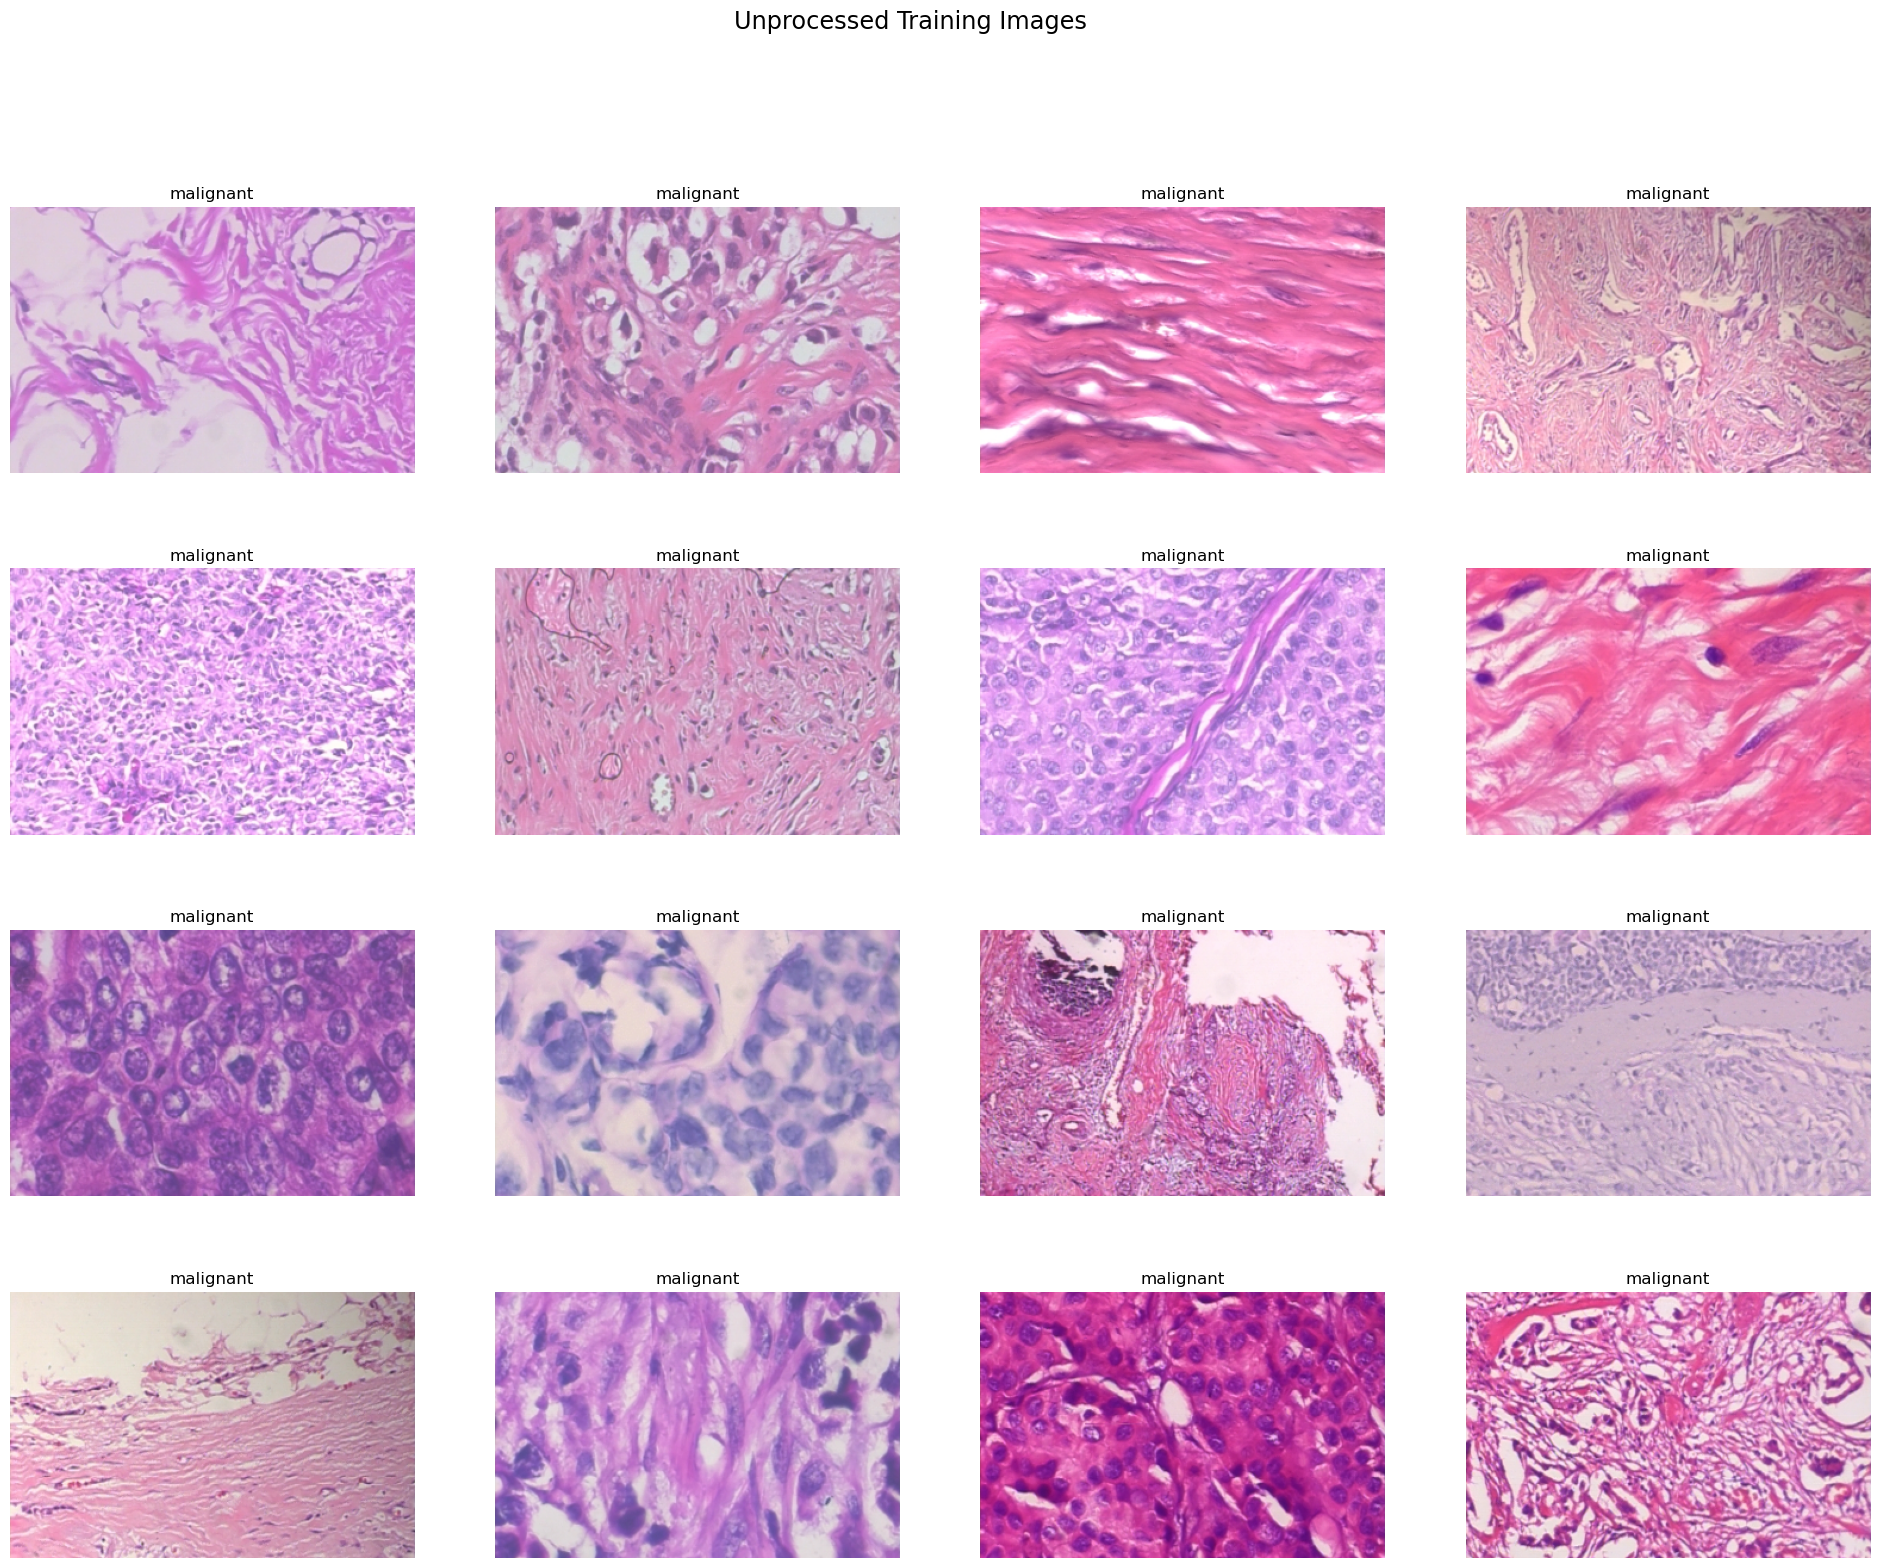

In [12]:
plot_images(train_ds_unprocessed, suptitle='Unprocessed Training Images')


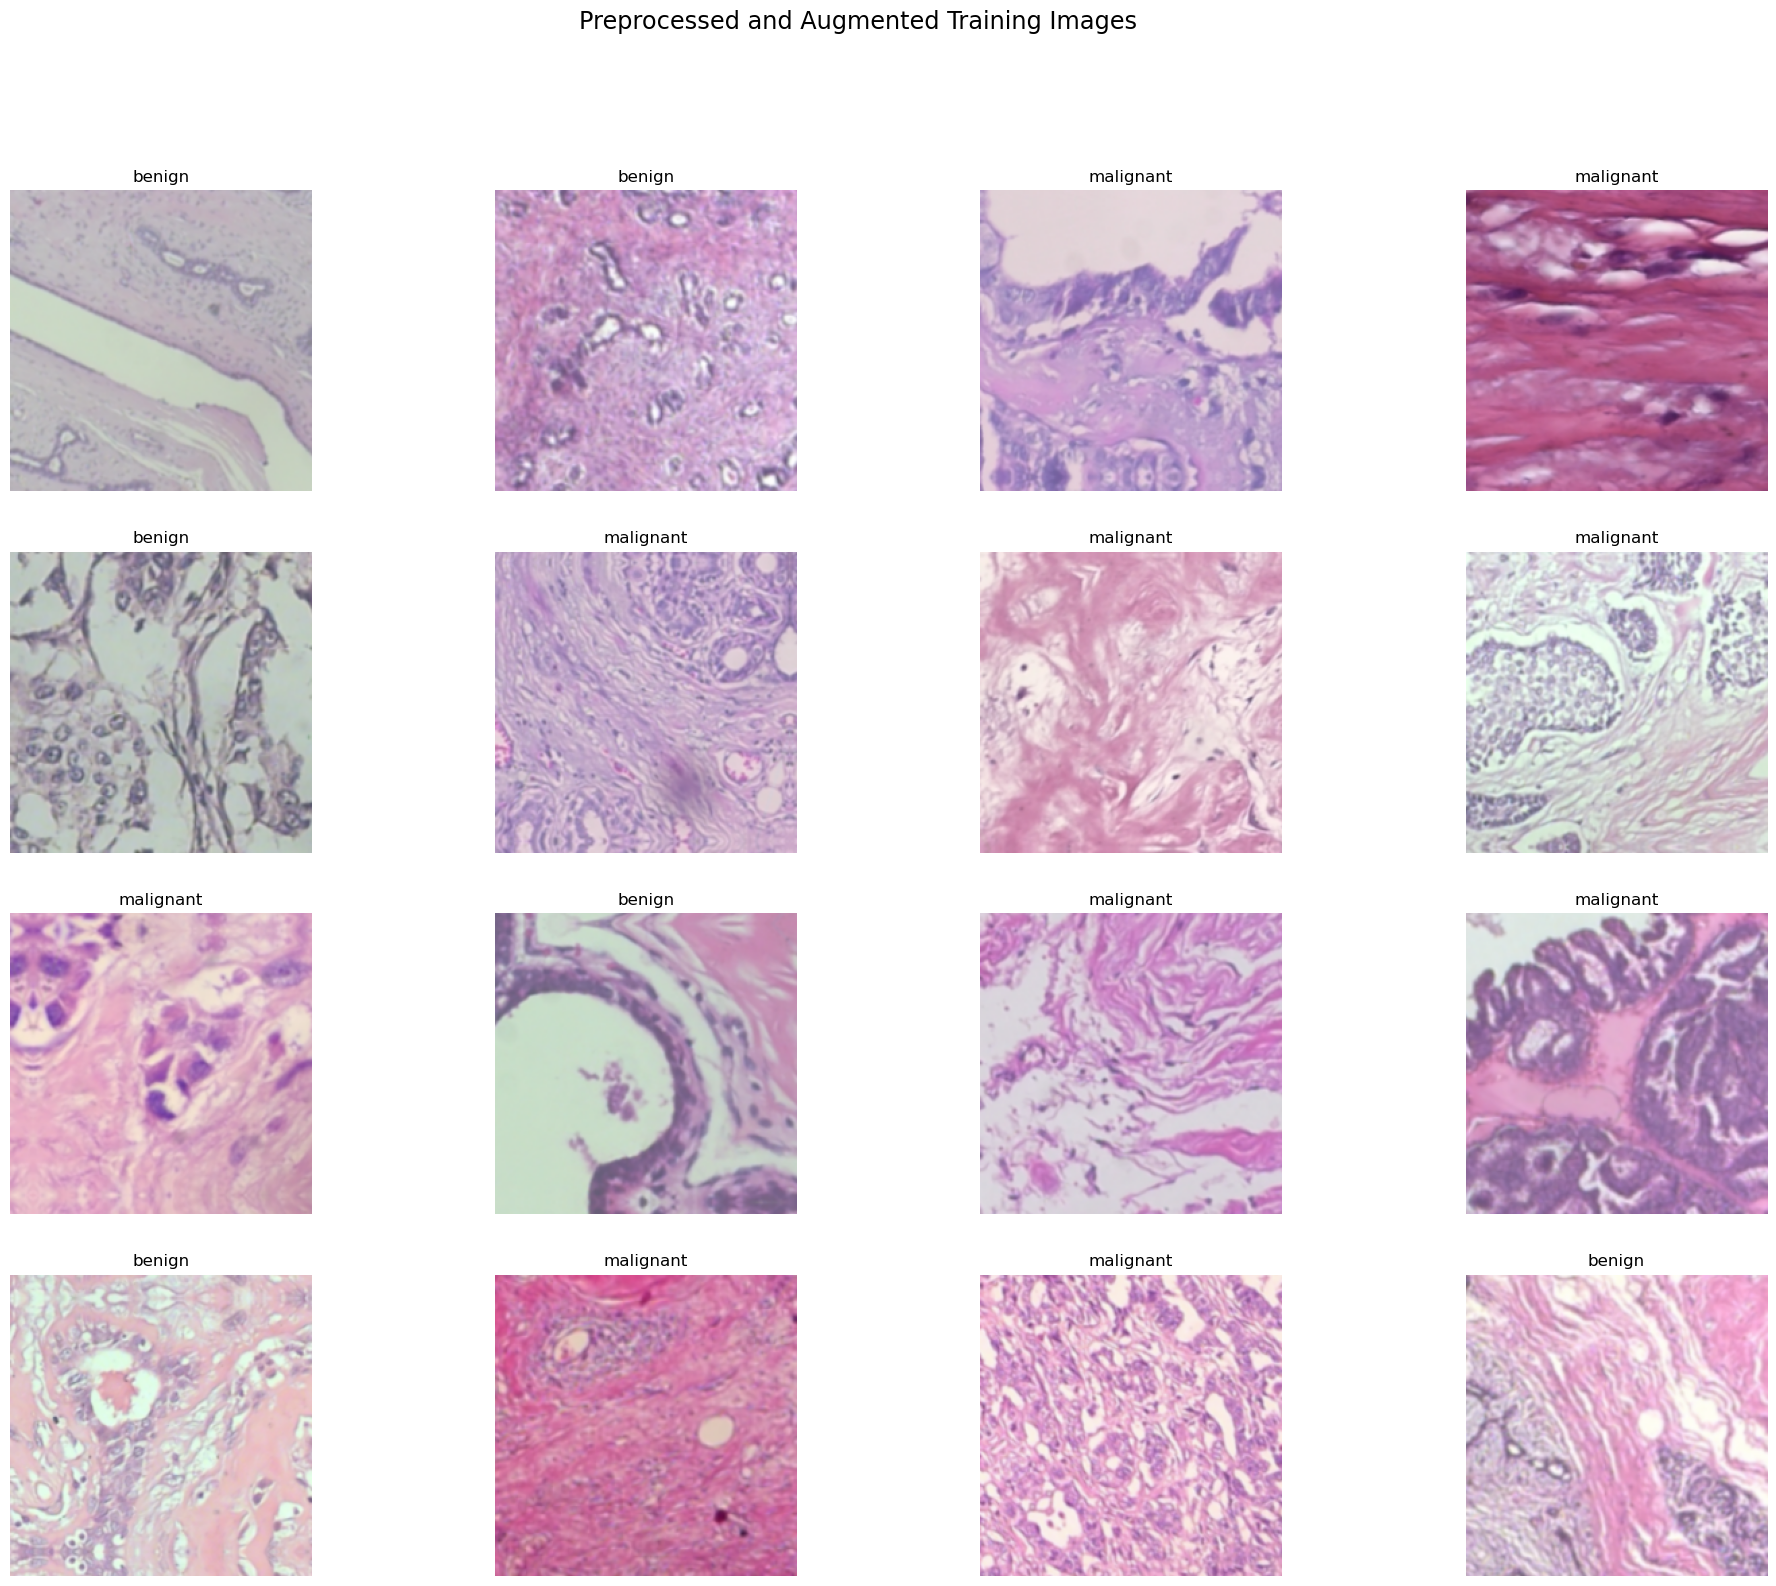

In [13]:
plot_images(train_ds, suptitle='Preprocessed and Augmented Training Images')


# 4. Train, Validate, and Show Metrics for Our Various Models


## VGGIN-Net


In [14]:
model = vgginnet_builder()
best_model_file = 'vgginnet_best_model.h5'

train_validate(
    model, train_ds, val_ds, best_model_file=best_model_file)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 VGG_Preprocess (Lambda)        (None, 224, 224, 3)  0           ['Image_Input[0][0]']            
                                                                                                  
 vgg16_features (Functional)    (None, 14, 14, 512)  7635264     ['VGG_Preprocess[0][0]']         
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 64)   32832       ['vgg16_features[0][0]']   

In [15]:
metrics = test(best_model_file, test_ds)
metrics


19/19 [==============================] - 10s 448ms/step - loss: 1.3746 - accuracy: 0.9275 - f1_score: 0.9177 - mae: 0.0732


{'loss': 1.374563455581665,
 'accuracy': 0.9275178909301758,
 'f1_score_benign_malignant': array([0.88931787, 0.94611526], dtype=float32),
 'mae': 0.07323300838470459}

## ResNet-50


In [16]:
model = resnet50_builder()
best_model_file = 'resnet50_best_model.h5'

train_validate(
    model, train_ds, val_ds, best_model_file=best_model_file)


94765736/94765736 [==============================] - 3s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________
None
Epoch 1/100
38/38 [==============================] - 30s 504ms/step - loss: 2.2079 - accuracy: 0.7654 -

In [17]:
metrics = test(best_model_file, test_ds)
metrics


19/19 [==============================] - 6s 182ms/step - loss: 0.8549 - accuracy: 0.8319 - f1_score: 0.8167 - mae: 0.1704


{'loss': 0.8548616170883179,
 'accuracy': 0.8318583965301514,
 'f1_score_benign_malignant': array([0.76404494, 0.8693944 ], dtype=float32),
 'mae': 0.17040449380874634}

## ResInNet-50 conv2_block3_out


In [18]:
model = resinnet50_builder('conv2_block3_out')
best_model_file = 'resinnet50_conv2_block3_out_best_model.h5'

train_validate(
    model, train_ds, val_ds, best_model_file=best_model_file)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Resnet_Preprocess (Lambda)     (None, 224, 224, 3)  0           ['Image_Input[0][0]']            
                                                                                                  
 resnet50_features (Functional)  (None, 56, 56, 256)  229760     ['Resnet_Preprocess[0][0]']      
                                                                                                  
 conv2d_3 (Conv2D)              (None, 56, 56, 64)   16448       ['resnet50_features[0][0]']

In [19]:
metrics = test(best_model_file, test_ds)
metrics


19/19 [==============================] - 4s 142ms/step - loss: 8.7018 - accuracy: 0.8723 - f1_score: 0.8545 - mae: 0.1272


{'loss': 8.701807022094727,
 'accuracy': 0.8723134994506836,
 'f1_score_benign_malignant': array([0.8036293, 0.9054012], dtype=float32),
 'mae': 0.1272013932466507}

## ResInNet-50 conv3_block4_out


In [20]:
model = resinnet50_builder('conv3_block4_out')
best_model_file = 'resinnet50_conv3_block4_out_best_model.h5'

train_validate(
    model, train_ds, val_ds, best_model_file=best_model_file)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Resnet_Preprocess (Lambda)     (None, 224, 224, 3)  0           ['Image_Input[0][0]']            
                                                                                                  
 resnet50_features (Functional)  (None, 28, 28, 512)  1460096    ['Resnet_Preprocess[0][0]']      
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 64)   32832       ['resnet50_features[0][0]']

In [21]:
metrics = test(best_model_file, test_ds)
metrics


19/19 [==============================] - 5s 151ms/step - loss: 5.3003 - accuracy: 0.8934 - f1_score: 0.8835 - mae: 0.1055


{'loss': 5.300291061401367,
 'accuracy': 0.8933839201927185,
 'f1_score_benign_malignant': array([0.84967315, 0.91740125], dtype=float32),
 'mae': 0.10553713142871857}

## ResInNet-50 conv4_block6_out


In [22]:
model = resinnet50_builder('conv4_block6_out')
best_model_file = 'resinnet50_conv4_block6_out_best_model.h5'

train_validate(
    model, train_ds, val_ds, best_model_file=best_model_file)


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Resnet_Preprocess (Lambda)     (None, 224, 224, 3)  0           ['Image_Input[0][0]']            
                                                                                                  
 resnet50_features (Functional)  (None, 14, 14, 1024  8589184    ['Resnet_Preprocess[0][0]']      
                                )                                                                 
                                                                                            

In [23]:
metrics = test(best_model_file, test_ds)
metrics


19/19 [==============================] - 6s 187ms/step - loss: 2.0657 - accuracy: 0.9271 - f1_score: 0.9182 - mae: 0.0732


{'loss': 2.0657107830047607,
 'accuracy': 0.9270964860916138,
 'f1_score_benign_malignant': array([0.89112645, 0.94520116], dtype=float32),
 'mae': 0.07320219278335571}

## ResInNet-50 conv5_block3_out


In [24]:
model = resinnet50_builder('conv5_block3_out')
best_model_file = 'resinnet50_conv5_block3_out_best_model.h5'

train_validate(
    model, train_ds, val_ds, best_model_file=best_model_file)


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Resnet_Preprocess (Lambda)     (None, 224, 224, 3)  0           ['Image_Input[0][0]']            
                                                                                                  
 resnet50_features (Functional)  (None, 7, 7, 2048)  23587712    ['Resnet_Preprocess[0][0]']      
                                                                                                  
 conv2d_12 (Conv2D)             (None, 7, 7, 64)     131136      ['resnet50_features[0][0]'

In [25]:
metrics = test(best_model_file, test_ds)
metrics


19/19 [==============================] - 6s 202ms/step - loss: 1.2501 - accuracy: 0.9322 - f1_score: 0.9226 - mae: 0.0678


{'loss': 1.2501468658447266,
 'accuracy': 0.9321534037590027,
 'f1_score_benign_malignant': array([0.89538664, 0.94979733], dtype=float32),
 'mae': 0.06784135103225708}